In [1]:
import vectorbtpro as vbt

vbt.settings.set_theme("dark")

In [2]:
# data = vbt.BinanceData.fetch(
#     ["BTCUSDT", "ETHUSDT", "BNBUSDT", "XRPUSDT", "ADAUSDT"], 
#     start="2020-01-01 UTC", 
#     end="2021-01-01 UTC",
#     timeframe="1h"
# )

# data.to_hdf()

In [3]:
data = vbt.HDFData.fetch("BinanceData.h5")

  0%|          | 0/5 [00:00<?, ?it/s]

## Allocation

### Manually

#### Index points

In [4]:
ms_points = data.wrapper.get_index_points(every="MS")
ms_points

array([   0,  744, 1434, 2177, 2895, 3639, 4356, 5100, 5844, 6564, 7308,
       8027])

In [5]:
import pandas as pd

data.wrapper.index.get_indexer(
    pd.Series(index=data.wrapper.index).resample("MS").asfreq().index, 
    method="bfill"
)

/Users/olegpolakow/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


array([   0,  744, 1434, 2177, 2895, 3639, 4356, 5100, 5844, 6564, 7308,
       8027])

In [6]:
data.wrapper.index[ms_points]

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-02-01 00:00:00+00:00',
               '2020-03-01 00:00:00+00:00', '2020-04-01 00:00:00+00:00',
               '2020-05-01 00:00:00+00:00', '2020-06-01 00:00:00+00:00',
               '2020-07-01 00:00:00+00:00', '2020-08-01 00:00:00+00:00',
               '2020-09-01 00:00:00+00:00', '2020-10-01 00:00:00+00:00',
               '2020-11-01 00:00:00+00:00', '2020-12-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [7]:
example_points = data.wrapper.get_index_points(every=24 * 30)
data.wrapper.index[example_points]

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-31 00:00:00+00:00',
               '2020-03-01 06:00:00+00:00', '2020-03-31 07:00:00+00:00',
               '2020-04-30 09:00:00+00:00', '2020-05-30 09:00:00+00:00',
               '2020-06-29 12:00:00+00:00', '2020-07-29 12:00:00+00:00',
               '2020-08-28 12:00:00+00:00', '2020-09-27 12:00:00+00:00',
               '2020-10-27 12:00:00+00:00', '2020-11-26 12:00:00+00:00',
               '2020-12-26 17:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [8]:
date_offset = pd.offsets.WeekOfMonth(week=3, weekday=4)
example_points = data.wrapper.get_index_points(
    every=date_offset, 
    add_delta=pd.Timedelta(hours=17)
)
data.wrapper.index[example_points]

DatetimeIndex(['2020-01-24 17:00:00+00:00', '2020-02-28 17:00:00+00:00',
               '2020-03-27 17:00:00+00:00', '2020-04-24 17:00:00+00:00',
               '2020-05-22 17:00:00+00:00', '2020-06-26 17:00:00+00:00',
               '2020-07-24 17:00:00+00:00', '2020-08-28 17:00:00+00:00',
               '2020-09-25 17:00:00+00:00', '2020-10-23 17:00:00+00:00',
               '2020-11-27 17:00:00+00:00', '2020-12-25 17:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [9]:
example_points = data.wrapper.get_index_points(
    start="April 1st 2020",
    every="MS"
)
data.wrapper.index[example_points]

DatetimeIndex(['2020-04-01 00:00:00+00:00', '2020-05-01 00:00:00+00:00',
               '2020-06-01 00:00:00+00:00', '2020-07-01 00:00:00+00:00',
               '2020-08-01 00:00:00+00:00', '2020-09-01 00:00:00+00:00',
               '2020-10-01 00:00:00+00:00', '2020-11-01 00:00:00+00:00',
               '2020-12-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [10]:
example_points = data.wrapper.get_index_points(
    on=["April 1st 2020 19:45", "17 September 2020 00:01"]
)
data.wrapper.index[example_points]

DatetimeIndex(['2020-04-01 20:00:00+00:00', '2020-09-17 01:00:00+00:00'], dtype='datetime64[ns, UTC]', name='Open time', freq=None)

#### Filling

In [11]:
symbol_wrapper = data.get_symbol_wrapper(freq="1h")
filled_allocations = symbol_wrapper.fill()
print(filled_allocations)

symbol                     ADAUSDT  BNBUSDT  BTCUSDT  ETHUSDT  XRPUSDT
Open time                                                             
2020-01-01 00:00:00+00:00      NaN      NaN      NaN      NaN      NaN
2020-01-01 01:00:00+00:00      NaN      NaN      NaN      NaN      NaN
2020-01-01 02:00:00+00:00      NaN      NaN      NaN      NaN      NaN
2020-01-01 03:00:00+00:00      NaN      NaN      NaN      NaN      NaN
2020-01-01 04:00:00+00:00      NaN      NaN      NaN      NaN      NaN
...                            ...      ...      ...      ...      ...
2020-12-31 19:00:00+00:00      NaN      NaN      NaN      NaN      NaN
2020-12-31 20:00:00+00:00      NaN      NaN      NaN      NaN      NaN
2020-12-31 21:00:00+00:00      NaN      NaN      NaN      NaN      NaN
2020-12-31 22:00:00+00:00      NaN      NaN      NaN      NaN      NaN
2020-12-31 23:00:00+00:00      NaN      NaN      NaN      NaN      NaN

[8767 rows x 5 columns]


In [12]:
import numpy as np
np.random.seed(42)  # (1)!

def random_allocate_func():
    weights = np.random.uniform(size=symbol_wrapper.shape[1])
    return weights / weights.sum()  # (2)!

for idx in ms_points:
    filled_allocations.iloc[idx] = random_allocate_func()

allocations = filled_allocations[~filled_allocations.isnull().any(axis=1)]
allocations

symbol,ADAUSDT,BNBUSDT,BTCUSDT,ETHUSDT,XRPUSDT
Open time,,,,,
2020-01-01 00:00:00+00:00,0.133197,0.338101,0.260318,0.212900,0.055485
2020-02-01 00:00:00+00:00,0.065285,0.024308,0.362501,0.251571,0.296334
2020-03-01 00:00:00+00:00,0.009284,0.437468,0.375464,0.095773,0.082010
2020-04-01 00:00:00+00:00,0.105673,0.175297,0.302353,0.248877,0.167800
2020-05-01 00:00:00+00:00,0.327909,0.074759,0.156568,0.196343,0.244421
2020-06-01 00:00:00+00:00,0.367257,0.093395,0.240527,0.277095,0.021727
2020-07-01 00:00:00+00:00,0.220313,0.061837,0.023590,0.344094,0.350166
2020-08-01 00:00:00+00:00,0.346199,0.130452,0.041828,0.293025,0.188497
2020-09-01 00:00:00+00:00,0.067065,0.272119,0.018898,0.499708,0.142210


#### Simulation

In [13]:
pf = vbt.Portfolio.from_orders(
    close=data.get("Close"),
    size=filled_allocations,
    size_type="targetpercent",
    group_by=True,
    cash_sharing=True,
    call_seq="auto"
)

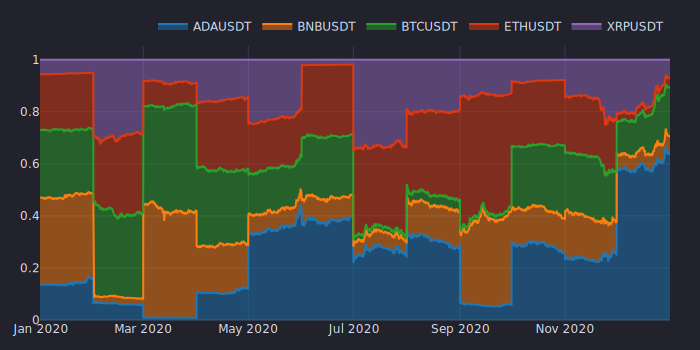

In [14]:
sim_alloc = pf.get_asset_value(group_by=False).vbt / pf.value
sim_alloc.vbt.plot(
   trace_kwargs=dict(stackgroup="one"),
   use_gl=False
).show_svg()

In [15]:
np.isclose(allocations, sim_alloc.iloc[ms_points])

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

### Optimizer

In [16]:
np.random.seed(42)

pf_opt = vbt.PortfolioOptimizer.from_allocate_func(
    symbol_wrapper,  # (1)!
    random_allocate_func,
    every="MS"
)

  0%|          | 0/12 [00:00<?, ?it/s]

In [17]:
print(pf_opt.allocations)

symbol                      ADAUSDT   BNBUSDT   BTCUSDT   ETHUSDT   XRPUSDT
Open time                                                                  
2020-01-01 00:00:00+00:00  0.133197  0.338101  0.260318  0.212900  0.055485
2020-02-01 00:00:00+00:00  0.065285  0.024308  0.362501  0.251571  0.296334
2020-03-01 00:00:00+00:00  0.009284  0.437468  0.375464  0.095773  0.082010
2020-04-01 00:00:00+00:00  0.105673  0.175297  0.302353  0.248877  0.167800
2020-05-01 00:00:00+00:00  0.327909  0.074759  0.156568  0.196343  0.244421
2020-06-01 00:00:00+00:00  0.367257  0.093395  0.240527  0.277095  0.021727
2020-07-01 00:00:00+00:00  0.220313  0.061837  0.023590  0.344094  0.350166
2020-08-01 00:00:00+00:00  0.346199  0.130452  0.041828  0.293025  0.188497
2020-09-01 00:00:00+00:00  0.067065  0.272119  0.018898  0.499708  0.142210
2020-10-01 00:00:00+00:00  0.297647  0.140040  0.233647  0.245617  0.083048
2020-11-01 00:00:00+00:00  0.232128  0.185574  0.224925  0.214230  0.143143
2020-12-01 0

In [18]:
print(pf_opt.fill_allocations())

symbol                      ADAUSDT   BNBUSDT   BTCUSDT  ETHUSDT   XRPUSDT
Open time                                                                 
2020-01-01 00:00:00+00:00  0.133197  0.338101  0.260318   0.2129  0.055485
2020-01-01 01:00:00+00:00       NaN       NaN       NaN      NaN       NaN
2020-01-01 02:00:00+00:00       NaN       NaN       NaN      NaN       NaN
2020-01-01 03:00:00+00:00       NaN       NaN       NaN      NaN       NaN
2020-01-01 04:00:00+00:00       NaN       NaN       NaN      NaN       NaN
...                             ...       ...       ...      ...       ...
2020-12-31 19:00:00+00:00       NaN       NaN       NaN      NaN       NaN
2020-12-31 20:00:00+00:00       NaN       NaN       NaN      NaN       NaN
2020-12-31 21:00:00+00:00       NaN       NaN       NaN      NaN       NaN
2020-12-31 22:00:00+00:00       NaN       NaN       NaN      NaN       NaN
2020-12-31 23:00:00+00:00       NaN       NaN       NaN      NaN       NaN

[8767 rows x 5 columns]


In [19]:
print(pf_opt.alloc_records.records_readable)

    Id  Group      Allocation Timestamp
0    0  group 2020-01-01 00:00:00+00:00
1    1  group 2020-02-01 00:00:00+00:00
2    2  group 2020-03-01 00:00:00+00:00
3    3  group 2020-04-01 00:00:00+00:00
4    4  group 2020-05-01 00:00:00+00:00
5    5  group 2020-06-01 00:00:00+00:00
6    6  group 2020-07-01 00:00:00+00:00
7    7  group 2020-08-01 00:00:00+00:00
8    8  group 2020-09-01 00:00:00+00:00
9    9  group 2020-10-01 00:00:00+00:00
10  10  group 2020-11-01 00:00:00+00:00
11  11  group 2020-12-01 00:00:00+00:00


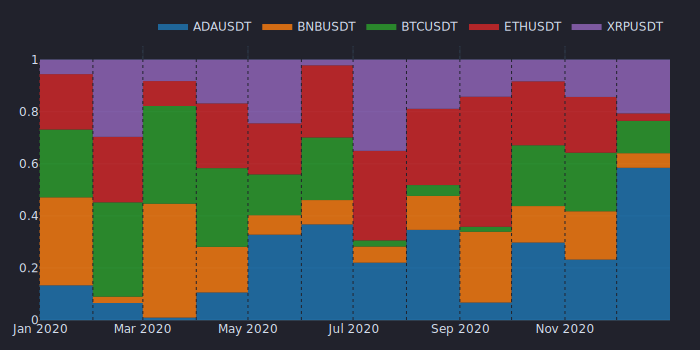

In [20]:
pf_opt.plot().show_svg()

In [21]:
pf_opt.stats()

Start                       2020-01-01 00:00:00+00:00
End                         2020-12-31 23:00:00+00:00
Period                              365 days 07:00:00
Total Records                                      12
Mean Allocation: ADAUSDT                     0.229714
Mean Allocation: BNBUSDT                     0.165789
Mean Allocation: BTCUSDT                     0.197075
Mean Allocation: ETHUSDT                     0.242326
Mean Allocation: XRPUSDT                     0.165096
Name: group, dtype: object

In [22]:
pf = vbt.Portfolio.from_optimizer(pf_opt, data.get("Close"), freq="1h")

pf.sharpe_ratio

2.097899528765609

#### Once

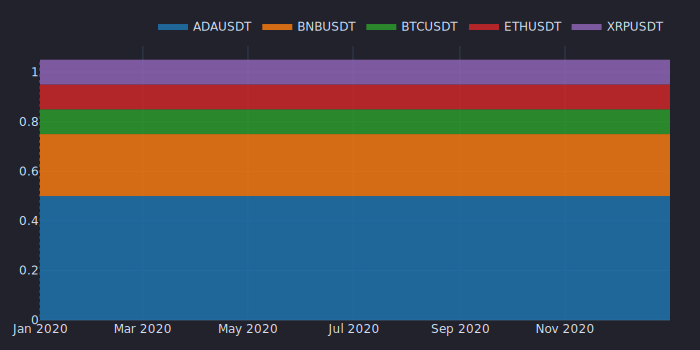

In [23]:
def const_allocate_func(target_alloc):
    return target_alloc

pf_opt = vbt.PortfolioOptimizer.from_allocate_func(
    symbol_wrapper,
    const_allocate_func,
    [0.5, 0.25, 0.1, 0.1, 0.1]
)

pf_opt.plot().show_svg()

#### Parsing

In [24]:
custom_index = pd.date_range("2020-01-01", "2021-01-01", freq="Q")
custom_allocations = pd.DataFrame(
    [
        [0.5, 0.25, 0.1, 0.1, 0.1],
        [0.1, 0.5, 0.25, 0.1, 0.1],
        [0.1, 0.1, 0.5, 0.25, 0.1],
        [0.1, 0.1, 0.1, 0.5, 0.25]
    ],
    index=custom_index, 
    columns=symbol_wrapper.columns
)

In [25]:
pf_opt = vbt.PortfolioOptimizer.from_allocations(
    symbol_wrapper,
    custom_allocations
)
print(pf_opt.allocations)

symbol                     ADAUSDT  BNBUSDT  BTCUSDT  ETHUSDT  XRPUSDT
Open time                                                             
2020-03-31 00:00:00+00:00      0.5     0.25     0.10     0.10     0.10
2020-06-30 00:00:00+00:00      0.1     0.50     0.25     0.10     0.10
2020-09-30 00:00:00+00:00      0.1     0.10     0.50     0.25     0.10
2020-12-31 00:00:00+00:00      0.1     0.10     0.10     0.50     0.25


In [26]:
pf_opt = vbt.PortfolioOptimizer.from_allocations(
    symbol_wrapper,
    custom_allocations.values,
    start="2020-01-01",
    end="2021-01-01",
    every="Q"
)
print(pf_opt.allocations)

symbol                     ADAUSDT  BNBUSDT  BTCUSDT  ETHUSDT  XRPUSDT
Open time                                                             
2020-03-31 00:00:00+00:00      0.5     0.25     0.10     0.10     0.10
2020-06-30 00:00:00+00:00      0.1     0.50     0.25     0.10     0.10
2020-09-30 00:00:00+00:00      0.1     0.10     0.50     0.25     0.10
2020-12-31 00:00:00+00:00      0.1     0.10     0.10     0.50     0.25


In [27]:
pf_opt = vbt.PortfolioOptimizer.from_filled_allocations(
    pf_opt.fill_allocations()
)
print(pf_opt.allocations)

symbol                     ADAUSDT  BNBUSDT  BTCUSDT  ETHUSDT  XRPUSDT
Open time                                                             
2020-03-31 00:00:00+00:00      0.5     0.25     0.10     0.10     0.10
2020-06-30 00:00:00+00:00      0.1     0.50     0.25     0.10     0.10
2020-09-30 00:00:00+00:00      0.1     0.10     0.50     0.25     0.10
2020-12-31 00:00:00+00:00      0.1     0.10     0.10     0.50     0.25


#### Templates

  0%|          | 0/12 [00:00<?, ?it/s]

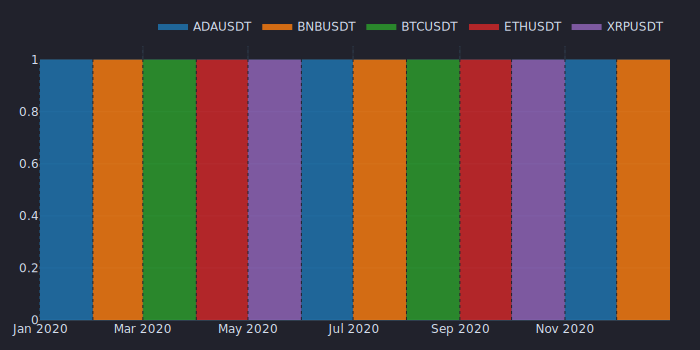

In [28]:
def rotation_allocate_func(wrapper, i):
    weights = np.full(len(wrapper.columns), 0)
    weights[i % len(wrapper.columns)] = 1
    return weights

pf_opt = vbt.PortfolioOptimizer.from_allocate_func(
    symbol_wrapper,
    rotation_allocate_func,
    vbt.Rep("wrapper"),
    vbt.Rep("i"),
    every="MS"
)

pf_opt.plot().show_svg()

In [29]:
def rotation_allocate_func(symbols, chosen_symbol):
    return {s: 1 if s == chosen_symbol else 0 for s in symbols}

pf_opt = vbt.PortfolioOptimizer.from_allocate_func(
    symbol_wrapper,
    rotation_allocate_func,
    vbt.RepEval("wrapper.columns"),  # (1)!
    vbt.RepEval("wrapper.columns[i % len(wrapper.columns)]"),
    every="MS"
)

  0%|          | 0/12 [00:00<?, ?it/s]

In [30]:
print(pf_opt.allocations)

symbol                     ADAUSDT  BNBUSDT  BTCUSDT  ETHUSDT  XRPUSDT
Open time                                                             
2020-01-01 00:00:00+00:00        1        0        0        0        0
2020-02-01 00:00:00+00:00        0        1        0        0        0
2020-03-01 00:00:00+00:00        0        0        1        0        0
2020-04-01 00:00:00+00:00        0        0        0        1        0
2020-05-01 00:00:00+00:00        0        0        0        0        1
2020-06-01 00:00:00+00:00        1        0        0        0        0
2020-07-01 00:00:00+00:00        0        1        0        0        0
2020-08-01 00:00:00+00:00        0        0        1        0        0
2020-09-01 00:00:00+00:00        0        0        0        1        0
2020-10-01 00:00:00+00:00        0        0        0        0        1
2020-11-01 00:00:00+00:00        1        0        0        0        0
2020-12-01 00:00:00+00:00        0        1        0        0        0


#### Groups

In [31]:
pf_opt = vbt.PortfolioOptimizer.from_allocate_func(
    symbol_wrapper,
    const_allocate_func,
    [1, 0.5, 0.1, 0.1, 0.1],
    every=vbt.pfopt_group_dict({
        "1MS": "1MS",
        "2MS": "2MS",
        "3MS": "3MS"
    })
)

pf = vbt.Portfolio.from_optimizer(pf_opt, data.get("Close"), freq="1h")
pf.total_return

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

alloc_group
1MS    2.596162
2MS    2.513234
3MS    2.524637
Name: total_return, dtype: float64

#### Numba

In [32]:
from numba import njit

@njit
def rotation_allocate_func_nb(i, idx, n_cols):
    weights = np.full(n_cols, 0)
    weights[i % n_cols] = 1
    return weights

pf_opt = vbt.PortfolioOptimizer.from_allocate_func(
    symbol_wrapper,
    rotation_allocate_func_nb,
    vbt.RepEval("len(wrapper.columns)"),
    every="W",
    jitted_loop=True
)

print(pf_opt.allocations.head())

symbol                     ADAUSDT  BNBUSDT  BTCUSDT  ETHUSDT  XRPUSDT
Open time                                                             
2020-01-05 00:00:00+00:00      1.0      0.0      0.0      0.0      0.0
2020-01-12 00:00:00+00:00      0.0      1.0      0.0      0.0      0.0
2020-01-19 00:00:00+00:00      0.0      0.0      1.0      0.0      0.0
2020-01-26 00:00:00+00:00      0.0      0.0      0.0      1.0      0.0
2020-02-02 00:00:00+00:00      0.0      0.0      0.0      0.0      1.0


#### Distribution

In [33]:
pf_opt = vbt.PortfolioOptimizer.from_allocate_func(
    symbol_wrapper,
    rotation_allocate_func_nb,
    vbt.Rep("i"),
    vbt.Rep("index_point"),
    vbt.RepEval("len(wrapper.columns)"),
    every="D",
    execute_kwargs=dict(engine="dask")
)

print(pf_opt.allocations.head())

symbol                     ADAUSDT  BNBUSDT  BTCUSDT  ETHUSDT  XRPUSDT
Open time                                                             
2020-01-01 00:00:00+00:00        1        0        0        0        0
2020-01-02 00:00:00+00:00        0        1        0        0        0
2020-01-03 00:00:00+00:00        0        0        1        0        0
2020-01-04 00:00:00+00:00        0        0        0        1        0
2020-01-05 00:00:00+00:00        0        0        0        0        1


In [34]:
pf_opt = vbt.PortfolioOptimizer.from_allocate_func(
    symbol_wrapper,
    rotation_allocate_func_nb,
    vbt.RepEval("len(wrapper.columns)"),
    every="D",
    jitted_loop=True,
    chunked=dict(
        arg_take_spec=dict(args=vbt.ArgsTaker(None)),
        engine="dask"
    )
)

print(pf_opt.allocations.head())

symbol                     ADAUSDT  BNBUSDT  BTCUSDT  ETHUSDT  XRPUSDT
Open time                                                             
2020-01-01 00:00:00+00:00      1.0      0.0      0.0      0.0      0.0
2020-01-02 00:00:00+00:00      0.0      1.0      0.0      0.0      0.0
2020-01-03 00:00:00+00:00      0.0      0.0      1.0      0.0      0.0
2020-01-04 00:00:00+00:00      0.0      0.0      0.0      1.0      0.0
2020-01-05 00:00:00+00:00      0.0      0.0      0.0      0.0      1.0


In [35]:
pf_opt = vbt.PortfolioOptimizer.from_allocate_func(
    symbol_wrapper,
    rotation_allocate_func_nb,
    vbt.RepEval("len(wrapper.columns)"),
    every="D",
    jitted_loop=True,
    jitted=dict(parallel=True)
)

print(pf_opt.allocations.head())

symbol                     ADAUSDT  BNBUSDT  BTCUSDT  ETHUSDT  XRPUSDT
Open time                                                             
2020-01-01 00:00:00+00:00      1.0      0.0      0.0      0.0      0.0
2020-01-02 00:00:00+00:00      0.0      1.0      0.0      0.0      0.0
2020-01-03 00:00:00+00:00      0.0      0.0      1.0      0.0      0.0
2020-01-04 00:00:00+00:00      0.0      0.0      0.0      1.0      0.0
2020-01-05 00:00:00+00:00      0.0      0.0      0.0      0.0      1.0


## Optimization

### Index ranges

In [36]:
example_ranges = data.wrapper.get_index_ranges(every="MS")
example_ranges

array([[   0,  744],
       [ 744, 1434],
       [1434, 2177],
       [2177, 2895],
       [2895, 3639],
       [3639, 4356],
       [4356, 5100],
       [5100, 5844],
       [5844, 6564],
       [6564, 7308],
       [7308, 8027]])

In [37]:
data.wrapper.index[example_ranges[0, 0]:example_ranges[0, 1]]

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-01 01:00:00+00:00',
               '2020-01-01 02:00:00+00:00', '2020-01-01 03:00:00+00:00',
               '2020-01-01 04:00:00+00:00', '2020-01-01 05:00:00+00:00',
               '2020-01-01 06:00:00+00:00', '2020-01-01 07:00:00+00:00',
               '2020-01-01 08:00:00+00:00', '2020-01-01 09:00:00+00:00',
               ...
               '2020-01-31 14:00:00+00:00', '2020-01-31 15:00:00+00:00',
               '2020-01-31 16:00:00+00:00', '2020-01-31 17:00:00+00:00',
               '2020-01-31 18:00:00+00:00', '2020-01-31 19:00:00+00:00',
               '2020-01-31 20:00:00+00:00', '2020-01-31 21:00:00+00:00',
               '2020-01-31 22:00:00+00:00', '2020-01-31 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', length=744, freq=None)

In [38]:
example_ranges = data.wrapper.get_index_ranges(
    every="MS", 
    lookback_period="3MS"
)

def get_index_bounds(index_ranges):
    for i in range(len(index_ranges)):
        range_index = data.wrapper.index[index_ranges[i, 0]:index_ranges[i, 1]]
        yield range_index[0], range_index[-1]

list(get_index_bounds(example_ranges))

[(Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-03-31 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-02-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-04-30 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-03-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-05-31 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-04-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-06-30 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-05-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-07-31 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-06-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-08-31 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-07-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-09-30 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-08-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-10-31 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-09-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-11-30 23:00:00+0000', tz='UTC'))]

In [39]:
example_ranges = data.wrapper.get_index_ranges(
    start=["2020-01-01", "2020-04-01", "2020-08-01"],
    end=["2020-04-01", "2020-08-01", "2020-12-01"]
)

list(get_index_bounds(example_ranges))

[(Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-03-31 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-04-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-07-31 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-08-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-11-30 23:00:00+0000', tz='UTC'))]

In [40]:
example_ranges = data.wrapper.get_index_ranges(
    start="2020-01-01",
    end=["2020-04-01", "2020-08-01", "2020-12-01"]
)

list(get_index_bounds(example_ranges))

[(Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-03-31 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-07-31 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-11-30 23:00:00+0000', tz='UTC'))]

In [41]:
example_ranges = data.wrapper.get_index_ranges(
    every="Q",
    exact_start=True,
    fixed_start=True
)

list(get_index_bounds(example_ranges))

[(Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-03-30 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-06-29 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-09-29 23:00:00+0000', tz='UTC')),
 (Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
  Timestamp('2020-12-30 23:00:00+0000', tz='UTC'))]

### Optimization method

In [42]:
def inv_rank_optimize_func(price, index_slice):
    price_period = price.iloc[index_slice]  # (1)!
    first_price = price_period.iloc[0]
    last_price = price_period.iloc[-1]
    ret = (last_price - first_price) / first_price  # (2)!
    ranks = ret.rank(ascending=False)
    return ranks / ranks.sum()  # (5)!

pf_opt = vbt.PortfolioOptimizer.from_optimize_func(
    symbol_wrapper,
    inv_rank_optimize_func,
    data.get("Close"),
    vbt.Rep("index_slice"),  # (6)!
    every="MS"
)

print(pf_opt.allocations)

  0%|          | 0/11 [00:00<?, ?it/s]

symbol                      ADAUSDT   BNBUSDT   BTCUSDT   ETHUSDT   XRPUSDT
Open time                                                                  
2020-02-01 00:00:00+00:00  0.066667  0.200000  0.266667  0.133333  0.333333
2020-03-01 00:00:00+00:00  0.333333  0.133333  0.266667  0.066667  0.200000
2020-04-01 00:00:00+00:00  0.266667  0.200000  0.133333  0.333333  0.066667
2020-05-01 00:00:00+00:00  0.066667  0.200000  0.266667  0.133333  0.333333
2020-06-01 00:00:00+00:00  0.066667  0.266667  0.200000  0.133333  0.333333
2020-07-01 00:00:00+00:00  0.066667  0.266667  0.200000  0.133333  0.333333
2020-08-01 00:00:00+00:00  0.066667  0.266667  0.333333  0.133333  0.200000
2020-09-01 00:00:00+00:00  0.333333  0.133333  0.266667  0.066667  0.200000
2020-10-01 00:00:00+00:00  0.266667  0.066667  0.133333  0.333333  0.200000
2020-11-01 00:00:00+00:00  0.333333  0.266667  0.066667  0.133333  0.200000
2020-12-01 00:00:00+00:00  0.133333  0.333333  0.266667  0.200000  0.066667


In [43]:
print(pf_opt.alloc_records.records_readable)

    Range Id  Group           Start Timestamp             End Timestamp  \
0          0  group 2020-01-01 00:00:00+00:00 2020-02-01 00:00:00+00:00   
1          1  group 2020-02-01 00:00:00+00:00 2020-03-01 00:00:00+00:00   
2          2  group 2020-03-01 00:00:00+00:00 2020-04-01 00:00:00+00:00   
3          3  group 2020-04-01 00:00:00+00:00 2020-05-01 00:00:00+00:00   
4          4  group 2020-05-01 00:00:00+00:00 2020-06-01 00:00:00+00:00   
5          5  group 2020-06-01 00:00:00+00:00 2020-07-01 00:00:00+00:00   
6          6  group 2020-07-01 00:00:00+00:00 2020-08-01 00:00:00+00:00   
7          7  group 2020-08-01 00:00:00+00:00 2020-09-01 00:00:00+00:00   
8          8  group 2020-09-01 00:00:00+00:00 2020-10-01 00:00:00+00:00   
9          9  group 2020-10-01 00:00:00+00:00 2020-11-01 00:00:00+00:00   
10        10  group 2020-11-01 00:00:00+00:00 2020-12-01 00:00:00+00:00   

        Allocation Timestamp  Status  
0  2020-02-01 00:00:00+00:00  Closed  
1  2020-03-01 00:00:0

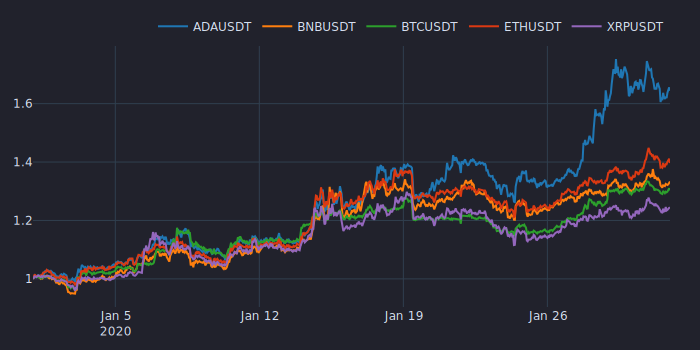

In [44]:
start_idx = pf_opt.alloc_records.values[0]["start_idx"]
end_idx = pf_opt.alloc_records.values[0]["end_idx"]
close_period = data.get("Close").iloc[start_idx:end_idx]
close_period.vbt.rebase(1).vbt.plot().show_svg()

In [45]:
pf_opt.stats()

Start                       2020-01-01 00:00:00+00:00
End                         2020-12-31 23:00:00+00:00
Period                              365 days 07:00:00
Total Records                                      11
Coverage                                     0.915593
Overlap Coverage                                  0.0
Mean Allocation: ADAUSDT                     0.181818
Mean Allocation: BNBUSDT                     0.212121
Mean Allocation: BTCUSDT                     0.218182
Mean Allocation: ETHUSDT                     0.163636
Mean Allocation: XRPUSDT                     0.224242
Name: group, dtype: object

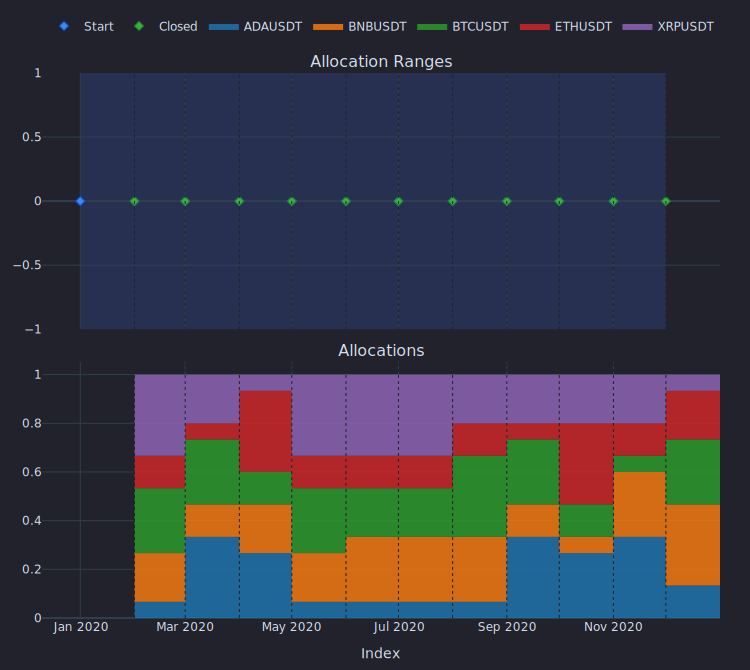

In [46]:
pf_opt.plots().show_svg()

#### Numba

In [47]:
@njit
def inv_rank_optimize_func_nb(i, start_idx, end_idx, price):
    price_period = price[start_idx:end_idx]
    first_price = price_period[0]
    last_price = price_period[-1]
    ret = (last_price - first_price) / first_price
    ranks = vbt.nb.rank_1d_nb(-ret)
    return ranks / ranks.sum()

pf_opt = vbt.PortfolioOptimizer.from_optimize_func(
    symbol_wrapper,
    inv_rank_optimize_func_nb,
    data.get("Close").values,  # (1)!
    every="MS",
    jitted_loop=True
)

print(pf_opt.allocations)

symbol                      ADAUSDT   BNBUSDT   BTCUSDT   ETHUSDT   XRPUSDT
Open time                                                                  
2020-02-01 00:00:00+00:00  0.066667  0.200000  0.266667  0.133333  0.333333
2020-03-01 00:00:00+00:00  0.333333  0.133333  0.266667  0.066667  0.200000
2020-04-01 00:00:00+00:00  0.266667  0.200000  0.133333  0.333333  0.066667
2020-05-01 00:00:00+00:00  0.066667  0.200000  0.266667  0.133333  0.333333
2020-06-01 00:00:00+00:00  0.066667  0.266667  0.200000  0.133333  0.333333
2020-07-01 00:00:00+00:00  0.066667  0.266667  0.200000  0.133333  0.333333
2020-08-01 00:00:00+00:00  0.066667  0.266667  0.333333  0.133333  0.200000
2020-09-01 00:00:00+00:00  0.333333  0.133333  0.266667  0.066667  0.200000
2020-10-01 00:00:00+00:00  0.266667  0.066667  0.133333  0.333333  0.200000
2020-11-01 00:00:00+00:00  0.333333  0.266667  0.066667  0.133333  0.200000
2020-12-01 00:00:00+00:00  0.133333  0.333333  0.266667  0.200000  0.066667


## Integrations

### PyPortfolioOpt

In [48]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier

expected_returns = mean_historical_return(data.get("Close"))
cov_matrix = CovarianceShrinkage(data.get("Close")).ledoit_wolf()
optimizer = EfficientFrontier(expected_returns, cov_matrix)
weights = optimizer.max_sharpe()
weights

OrderedDict([('ADAUSDT', 0.1165427361735328),
             ('BNBUSDT', 0.0),
             ('BTCUSDT', 0.0),
             ('ETHUSDT', 0.8834572638264673),
             ('XRPUSDT', 0.0)])

#### Parsing

In [49]:
from vectorbtpro.portfolio.pfopt.base import resolve_pypfopt_func_kwargs

print(vbt.format_func(mean_historical_return))

print(vbt.prettify(resolve_pypfopt_func_kwargs(
    mean_historical_return, 
    prices=data.get("Close"),  # (1)!
    freq="1h",  # (2)!
    year_freq="365d",
    other_arg=100  # (3)!
)))

mean_historical_return(
    prices,
    returns_data=False,
    compounding=True,
    frequency=252,
    log_returns=False
):
    Calculate annualised mean (daily) historical return from input (daily) asset prices.
    Use ``compounding`` to toggle between the default geometric mean (CAGR) and the
    arithmetic mean.
    
    :param prices: adjusted closing prices of the asset, each row is a date
                   and each column is a ticker/id.
    :type prices: pd.DataFrame
    :param returns_data: if true, the first argument is returns instead of prices.
                         These **should not** be log returns.
    :type returns_data: bool, defaults to False.
    :param compounding: computes geometric mean returns if True,
                        arithmetic otherwise, optional.
    :type compounding: bool, defaults to True
    :param frequency: number of time periods in a year, defaults to 252 (the number
                      of trading days in a year)
    :type frequency: in

In [50]:
print(vbt.prettify(resolve_pypfopt_func_kwargs(
    EfficientFrontier, 
    prices=data.get("Close")
)))

{
    'expected_returns': <pandas.core.series.Series object at 0x7f86920b6d68 of shape (5,)>,
    'cov_matrix': <pandas.core.frame.DataFrame object at 0x7f8692330908 of shape (5, 5)>,
    'weight_bounds': (
        0,
        1
    ),
    'solver': None,
    'verbose': False,
    'solver_options': None
}


In [51]:
print(vbt.prettify(resolve_pypfopt_func_kwargs(
    EfficientFrontier, 
    prices=data.get("Close"),
    expected_returns="ema_historical_return",
    cov_matrix="sample_cov"
)))

{
    'expected_returns': <pandas.core.series.Series object at 0x7f86920b6e10 of shape (5,)>,
    'cov_matrix': <pandas.core.frame.DataFrame object at 0x7f8692330668 of shape (5, 5)>,
    'weight_bounds': (
        0,
        1
    ),
    'solver': None,
    'verbose': False,
    'solver_options': None
}


#### Auto-optimization

In [52]:
vbt.pypfopt_optimize(prices=data.get("Close"))

{'ADAUSDT': 0.11654,
 'BNBUSDT': 0.0,
 'BTCUSDT': 0.0,
 'ETHUSDT': 0.88346,
 'XRPUSDT': 0.0}

In [53]:
S = CovarianceShrinkage(data.get("Close")).ledoit_wolf()
ef = EfficientFrontier(None, S, weight_bounds=(-1, 1))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ADAUSDT', -0.01119),
             ('BNBUSDT', 0.09687),
             ('BTCUSDT', 0.96235),
             ('ETHUSDT', -0.10505),
             ('XRPUSDT', 0.05702)])

In [54]:
vbt.pypfopt_optimize(
    prices=data.get("Close"),
    expected_returns=None,
    weight_bounds=(-1, 1),
    target="min_volatility"
)

{'ADAUSDT': -0.01119,
 'BNBUSDT': 0.09687,
 'BTCUSDT': 0.96235,
 'ETHUSDT': -0.10505,
 'XRPUSDT': 0.05702}

In [55]:
from pypfopt.expected_returns import capm_return

sector_mapper = {
    "ADAUSDT": "DeFi",
    "BNBUSDT": "DeFi",
    "BTCUSDT": "Payment",
    "ETHUSDT": "DeFi",
    "XRPUSDT": "Payment"
}
sector_lower = {
    "DeFi": 0.75
}
sector_upper = {}

mu = capm_return(data.get("Close"))
S = CovarianceShrinkage(data.get("Close")).ledoit_wolf()
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
adausdt_index = ef.tickers.index("ADAUSDT")
ef.add_constraint(lambda w: w[adausdt_index] == 0.10)
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('ADAUSDT', 0.1),
             ('BNBUSDT', 0.27719),
             ('BTCUSDT', 0.0524),
             ('ETHUSDT', 0.37281),
             ('XRPUSDT', 0.1976)])

In [56]:
adausdt_index = list(sector_mapper.keys()).index("ADAUSDT")
vbt.pypfopt_optimize(
    prices=data.get("Close"),
    sector_mapper=sector_mapper,
    sector_lower=sector_lower,
    sector_upper=sector_upper,
    constraints=[lambda w: w[adausdt_index] == 0.10],
    expected_returns="capm_return"
)

{'ADAUSDT': 0.1,
 'BNBUSDT': 0.27719,
 'BTCUSDT': 0.0524,
 'ETHUSDT': 0.37281,
 'XRPUSDT': 0.1976}

In [57]:
from pypfopt.objective_functions import L2_reg

mu = capm_return(data.get("Close"))
S = CovarianceShrinkage(data.get("Close")).ledoit_wolf()
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(0.15)
weights = ef.clean_weights()
weights

OrderedDict([('ADAUSDT', 0.26004),
             ('BNBUSDT', 0.24467),
             ('BTCUSDT', 0.10778),
             ('ETHUSDT', 0.2453),
             ('XRPUSDT', 0.14222)])

In [58]:
vbt.pypfopt_optimize(
    prices=data.get("Close"),
    expected_returns="capm_return",
    sector_mapper=sector_mapper,
    sector_lower=sector_lower,
    sector_upper=sector_upper,
    objectives=["L2_reg"],
    gamma=0.1,
    target="efficient_risk",
    target_volatility=0.15
)

{'ADAUSDT': 0.26004,
 'BNBUSDT': 0.24467,
 'BTCUSDT': 0.10778,
 'ETHUSDT': 0.2453,
 'XRPUSDT': 0.14222}

In [59]:
from pypfopt import EfficientSemivariance
from pypfopt.expected_returns import returns_from_prices

mu = capm_return(data.get("Close"))
returns = returns_from_prices(data.get("Close"))
returns = returns.dropna()
es = EfficientSemivariance(mu, returns)
es.efficient_return(0.01)
weights = es.clean_weights()
weights

OrderedDict([('ADAUSDT', 0.0),
             ('BNBUSDT', 0.0),
             ('BTCUSDT', 1.0),
             ('ETHUSDT', 0.0),
             ('XRPUSDT', 0.0)])

In [60]:
vbt.pypfopt_optimize(
    prices=data.get("Close"),
    expected_returns="capm_return",
    optimizer="efficient_semivariance",
    target="efficient_return",
    target_return=0.01
)

{'ADAUSDT': 0.0, 'BNBUSDT': 0.0, 'BTCUSDT': 1, 'ETHUSDT': 0.0, 'XRPUSDT': 0.0}

In [61]:
initial_weights = np.array([1 / len(data.symbols)] * len(data.symbols))

In [62]:
from pypfopt.objective_functions import transaction_cost

mu = mean_historical_return(data.get("Close"))
S = CovarianceShrinkage(data.get("Close")).ledoit_wolf()
ef = EfficientFrontier(mu, S)
ef.add_objective(transaction_cost, w_prev=initial_weights, k=0.001)
ef.add_objective(L2_reg, gamma=0.05)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ADAUSDT', 0.16025),
             ('BNBUSDT', 0.2),
             ('BTCUSDT', 0.27239),
             ('ETHUSDT', 0.2),
             ('XRPUSDT', 0.16736)])

In [63]:
vbt.pypfopt_optimize(
    prices=data.get("Close"),
    objectives=["transaction_cost", "L2_reg"],
    w_prev=initial_weights, 
    k=0.001,
    gamma=0.05,
    target="min_volatility"
)

{'ADAUSDT': 0.16025,
 'BNBUSDT': 0.2,
 'BTCUSDT': 0.27239,
 'ETHUSDT': 0.2,
 'XRPUSDT': 0.16736}

In [64]:
import cvxpy as cp

def logarithmic_barrier_objective(w, cov_matrix, k=0.1):
    log_sum = cp.sum(cp.log(w))
    var = cp.quad_form(w, cov_matrix)
    return var - k * log_sum

In [65]:
mu = mean_historical_return(data.get("Close"))
S = CovarianceShrinkage(data.get("Close")).ledoit_wolf()
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.3))
ef.convex_objective(logarithmic_barrier_objective, cov_matrix=S, k=0.001)
weights = ef.clean_weights()
weights

OrderedDict([('ADAUSDT', 0.12214),
             ('BNBUSDT', 0.22171),
             ('BTCUSDT', 0.3),
             ('ETHUSDT', 0.21857),
             ('XRPUSDT', 0.13758)])

In [66]:
vbt.pypfopt_optimize(
    prices=data.get("Close"),
    weight_bounds=(0.01, 0.3),
    k=0.001,
    target=logarithmic_barrier_objective
)

{'ADAUSDT': 0.12214,
 'BNBUSDT': 0.22171,
 'BTCUSDT': 0.3,
 'ETHUSDT': 0.21857,
 'XRPUSDT': 0.13758}

In [67]:
def deviation_risk_parity(w, cov_matrix):
    cov_matrix = np.asarray(cov_matrix)
    n = cov_matrix.shape[0]
    rp = (w * (cov_matrix @ w)) / cp.quad_form(w, cov_matrix)
    return cp.sum_squares(rp - 1 / n).value

In [68]:
mu = mean_historical_return(data.get("Close"))
S = CovarianceShrinkage(data.get("Close")).ledoit_wolf()
ef = EfficientFrontier(mu, S)
ef.nonconvex_objective(deviation_risk_parity, ef.cov_matrix)
weights = ef.clean_weights()
weights

OrderedDict([('ADAUSDT', 0.17421),
             ('BNBUSDT', 0.19932),
             ('BTCUSDT', 0.2515),
             ('ETHUSDT', 0.1981),
             ('XRPUSDT', 0.17687)])

In [69]:
vbt.pypfopt_optimize(
    prices=data.get("Close"),
    target=deviation_risk_parity,
    target_is_convex=False
)

{'ADAUSDT': 0.17421,
 'BNBUSDT': 0.19932,
 'BTCUSDT': 0.2515,
 'ETHUSDT': 0.1981,
 'XRPUSDT': 0.17687}

In [70]:
sp500_data = vbt.YFData.fetch(
    "^GSPC", 
    start=data.wrapper.index[0], 
    end=data.wrapper.index[-1]
)
market_caps = data.get("Close") * data.get("Volume")
viewdict = {
    "ADAUSDT": 0.20, 
    "BNBUSDT": -0.30, 
    "BTCUSDT": 0, 
    "ETHUSDT": -0.2, 
    "XRPUSDT": 0.15
}

In [71]:
from pypfopt.black_litterman import (
    market_implied_risk_aversion,
    market_implied_prior_returns,
    BlackLittermanModel
)

S = CovarianceShrinkage(data.get("Close")).ledoit_wolf()
delta = market_implied_risk_aversion(sp500_data.get("Close"))
prior = market_implied_prior_returns(market_caps.iloc[-1], delta, S)
bl = BlackLittermanModel(S, pi=prior, absolute_views=viewdict)
rets = bl.bl_returns()
ef = EfficientFrontier(rets, S)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ADAUSDT', 0.0),
             ('BNBUSDT', 0.06738),
             ('BTCUSDT', 0.89462),
             ('ETHUSDT', 0.0),
             ('XRPUSDT', 0.038)])

In [72]:
vbt.pypfopt_optimize(
    prices=data.get("Close"),
    expected_returns="bl_returns",
    market_prices=sp500_data.get("Close"),
    market_caps=market_caps.iloc[-1],
    absolute_views=viewdict,
    target="min_volatility"
)

{'ADAUSDT': 0.0,
 'BNBUSDT': 0.06738,
 'BTCUSDT': 0.89462,
 'ETHUSDT': 0.0,
 'XRPUSDT': 0.038}

In [73]:
from pypfopt import HRPOpt

rets = returns_from_prices(data.get("Close"))
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('ADAUSDT', 0.19415),
             ('BNBUSDT', 0.24832),
             ('BTCUSDT', 0.22827),
             ('ETHUSDT', 0.15218),
             ('XRPUSDT', 0.17708)])

In [74]:
vbt.pypfopt_optimize(
    prices=data.get("Close"),
    optimizer="hrp",
    target="optimize"
)

{'ADAUSDT': 0.19415,
 'BNBUSDT': 0.24832,
 'BTCUSDT': 0.22827,
 'ETHUSDT': 0.15218,
 'XRPUSDT': 0.17708}

#### Argument groups

In [75]:
vbt.pypfopt_optimize(  
    prices=data.get("Close"),
    expected_returns="bl_returns",  
    market_prices=sp500_data.get("Close"),
    market_caps=market_caps.iloc[-1],
    absolute_views=viewdict,
    target="min_volatility",
    cov_matrix=vbt.pypfopt_func_dict({
        "EfficientFrontier": "sample_cov",
        "_default": "ledoit_wolf"
    })
)

{'ADAUSDT': 0.0,
 'BNBUSDT': 0.05008,
 'BTCUSDT': 0.91912,
 'ETHUSDT': 0.0,
 'XRPUSDT': 0.0308}

#### Rebalancing

  0%|          | 0/51 [00:00<?, ?it/s]

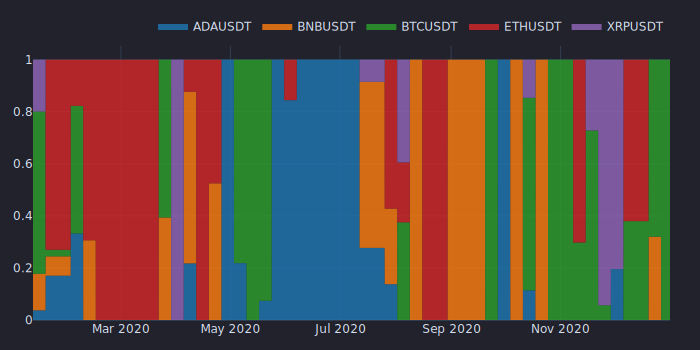

In [76]:
pf_opt = vbt.PortfolioOptimizer.from_pypfopt(
    symbol_wrapper,
    every="W",
    prices=vbt.RepEval(
        "close.iloc[index_slice]", 
        context=dict(close=data.get("Close"))
    ), 
    ignore_opt_errors=True
)

pf_opt.plot().show_svg()

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

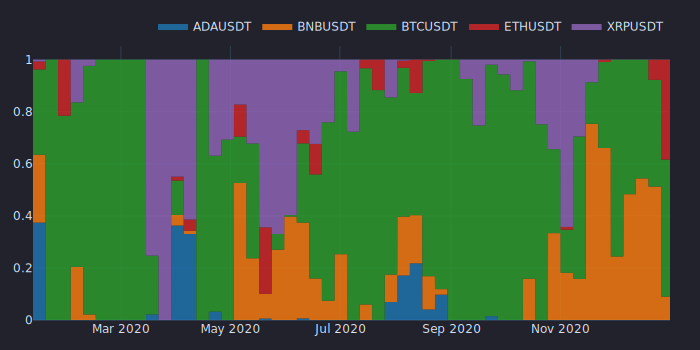

In [77]:
pf_opt = vbt.PortfolioOptimizer.from_pypfopt(
    symbol_wrapper,
    every="W",
    prices=vbt.RepEval(
        "close.iloc[index_slice]", 
        context=dict(close=data.get("Close"))
    ), 
    ignore_opt_errors=True,
    target=vbt.pfopt_group_dict({
        "max_sharpe": "max_sharpe",
        "min_volatility": "min_volatility",
        "max_quadratic_utility": "max_quadratic_utility"
    })
)

pf_opt.plot(column="min_volatility").show_svg()

In [78]:
pf = vbt.Portfolio.from_optimizer(pf_opt, data.get("Close"), freq="1h")

pf.sharpe_ratio

alloc_group
max_sharpe               2.778898
min_volatility           1.862970
max_quadratic_utility    2.352550
Name: sharpe_ratio, dtype: float64

### Universal portfolios

In [79]:
from universal import tools, algos

algo = algos.CRP()
algo_result = algo.run(data.get("Close"))
print(algo_result.weights)

symbol                     ADAUSDT  BNBUSDT  BTCUSDT  ETHUSDT  XRPUSDT  CASH
Open time                                                                   
2020-01-01 00:00:00+00:00      0.2      0.2      0.2      0.2      0.2   0.0
2020-01-01 01:00:00+00:00      0.2      0.2      0.2      0.2      0.2   0.0
2020-01-01 02:00:00+00:00      0.2      0.2      0.2      0.2      0.2   0.0
2020-01-01 03:00:00+00:00      0.2      0.2      0.2      0.2      0.2   0.0
2020-01-01 04:00:00+00:00      0.2      0.2      0.2      0.2      0.2   0.0
...                            ...      ...      ...      ...      ...   ...
2020-12-31 19:00:00+00:00      0.2      0.2      0.2      0.2      0.2   0.0
2020-12-31 20:00:00+00:00      0.2      0.2      0.2      0.2      0.2   0.0
2020-12-31 21:00:00+00:00      0.2      0.2      0.2      0.2      0.2   0.0
2020-12-31 22:00:00+00:00      0.2      0.2      0.2      0.2      0.2   0.0
2020-12-31 23:00:00+00:00      0.2      0.2      0.2      0.2      0.2   0.0

In [80]:
algo = algos.DynamicCRP(
    n=30, 
    min_history=7, 
    metric='sharpe', 
    alpha=0.01
)
algo_result = algo.run(data.get("Close").resample("D").last())
down_weights = algo_result.weights
print(down_weights)

symbol                          ADAUSDT       BNBUSDT   BTCUSDT       ETHUSDT  \
Open time                                                                       
2020-01-01 00:00:00+00:00  2.000000e-01  2.000000e-01  0.200000  2.000000e-01   
2020-01-02 00:00:00+00:00  2.000000e-01  2.000000e-01  0.200000  2.000000e-01   
2020-01-03 00:00:00+00:00  2.000000e-01  2.000000e-01  0.200000  2.000000e-01   
2020-01-04 00:00:00+00:00  2.000000e-01  2.000000e-01  0.200000  2.000000e-01   
2020-01-05 00:00:00+00:00  2.000000e-01  2.000000e-01  0.200000  2.000000e-01   
...                                 ...           ...       ...           ...   
2020-12-27 00:00:00+00:00  0.000000e+00  0.000000e+00  0.675463  0.000000e+00   
2020-12-28 00:00:00+00:00  1.291543e-08  1.247349e-08  0.665360  1.261995e-08   
2020-12-29 00:00:00+00:00  8.475716e-09  8.176270e-09  0.664594  8.274986e-09   
2020-12-30 00:00:00+00:00  0.000000e+00  0.000000e+00  0.656068  0.000000e+00   
2020-12-31 00:00:00+00:00  0

In [81]:
weights = down_weights.vbt.latest_at_index(
    data.wrapper.index,
    target_freq="1h",
    source_rbound=True,
    target_rbound=True,
    ffill=False
)
print(weights)

symbol                     ADAUSDT  BNBUSDT   BTCUSDT  ETHUSDT  XRPUSDT
Open time                                                              
2020-01-01 00:00:00+00:00      NaN      NaN       NaN      NaN      NaN
2020-01-01 01:00:00+00:00      NaN      NaN       NaN      NaN      NaN
2020-01-01 02:00:00+00:00      NaN      NaN       NaN      NaN      NaN
2020-01-01 03:00:00+00:00      NaN      NaN       NaN      NaN      NaN
2020-01-01 04:00:00+00:00      NaN      NaN       NaN      NaN      NaN
...                            ...      ...       ...      ...      ...
2020-12-31 19:00:00+00:00      NaN      NaN       NaN      NaN      NaN
2020-12-31 20:00:00+00:00      NaN      NaN       NaN      NaN      NaN
2020-12-31 21:00:00+00:00      NaN      NaN       NaN      NaN      NaN
2020-12-31 22:00:00+00:00      NaN      NaN       NaN      NaN      NaN
2020-12-31 23:00:00+00:00      0.0      0.0  0.655105      0.0      0.0

[8767 rows x 5 columns]


  0%|          | 0/4 [00:00<?, ?it/s]

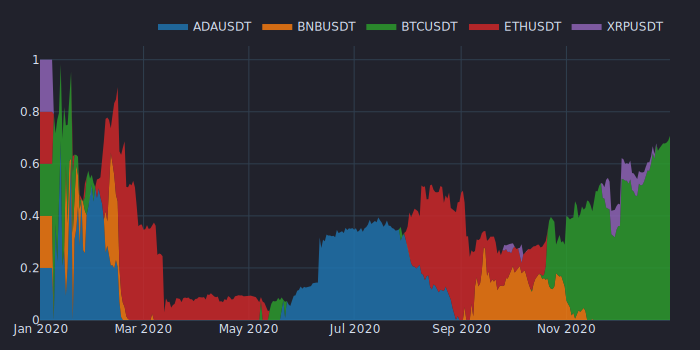

In [82]:
down_pf_opt = vbt.PortfolioOptimizer.from_universal_algo(
    "DynamicCRP",
    data.get("Close").resample("D").last(),
    n=vbt.pfopt_group_dict({7: 7, 14: 14, 30: 30, 90: 90}), 
    min_history=7, 
    metric='sharpe', 
    alpha=0.01
)

down_pf_opt.plot(column=90).show_svg()

In [83]:
resampler = vbt.Resampler(
    down_pf_opt.wrapper.index, 
    data.wrapper.index, 
    target_freq="1h"
)
pf_opt = down_pf_opt.resample(resampler)

In [84]:
pf = vbt.Portfolio.from_optimizer(pf_opt, data.get("Close"), freq="1h")

pf.sharpe_ratio

alloc_group
7     2.913033
14    3.455926
30    3.276730
90    2.176632
Name: sharpe_ratio, dtype: float64

#### Custom algorithm

In [85]:
from universal.algo import Algo

class MeanReversion(Algo):
    PRICE_TYPE = 'log'
    
    def __init__(self, n):
        self.n = n
        super().__init__(min_history=n)
    
    def init_weights(self, cols):
        return pd.Series(np.zeros(len(cols)), cols)
    
    def step(self, x, last_b, history):
        ma = history.iloc[-self.n:].mean()
        delta = x - ma
        w = np.maximum(-delta, 0.)
        return w / sum(w)

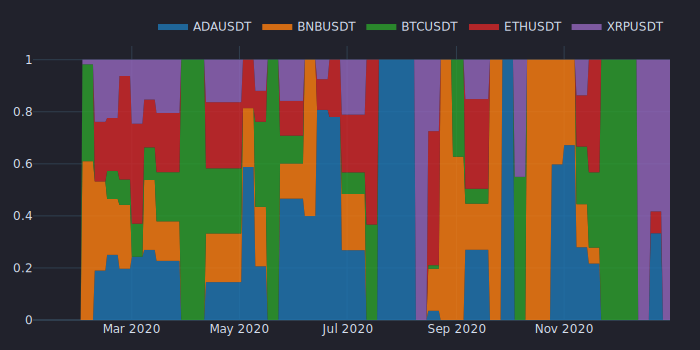

In [86]:
pf_opt = vbt.PortfolioOptimizer.from_universal_algo(
    MeanReversion,
    data.get("Close").resample("D").last(),
    n=30,
    every="W"
)

pf_opt.plot().show_svg()

## Dynamic

In [87]:
from vectorbtpro.portfolio.enums import SizeType, Direction
from vectorbtpro.portfolio import nb as pf_nb
from collections import namedtuple

GroupMemory = namedtuple("GroupMemory", [  # (1)!
    "target_alloc", 
    "size_type",
    "direction",
    "order_value_out"
])

@njit
def pre_group_func_nb(c):  # (2)!
    group_memory = GroupMemory(
        target_alloc=np.full(c.group_len, np.nan),  # (3)!
        size_type=np.full(c.group_len, SizeType.TargetPercent),  # (4)!
        direction=np.full(c.group_len, Direction.Both),
        order_value_out=np.full(c.group_len, np.nan)  # (5)!
    )
    return group_memory,

@njit
def pre_segment_func_nb(  # (6)!
    c, 
    group_memory,  # (7)!
    min_history,  # (8)!
    threshold,  # (9)!
    allocate_func_nb,  # (10)!
    *args
):
    should_rebalance = False
    
    if c.i >= min_history:
        in_position = False
        for col in range(c.from_col, c.to_col):
            if c.last_position[col] != 0:
                in_position = True
                break
                
        if not in_position:
            should_rebalance = True
        else:
            curr_value = c.last_value[c.group]
            for group_col in range(c.group_len):
                col = c.from_col + group_col
                curr_position = c.last_position[col]
                curr_price = c.last_val_price[col]
                curr_alloc = curr_position * curr_price / curr_value
                curr_threshold = pf_nb.get_col_elem_nb(c, col, threshold)
                alloc_diff = curr_alloc - group_memory.target_alloc[group_col]
                
                if abs(alloc_diff) >= curr_threshold:
                    should_rebalance = True
                    break
                    
    if should_rebalance:
        allocate_func_nb(c, group_memory, *args)  # (11)!
        pf_nb.sort_call_seq_nb(  # (12)!
            c, 
            group_memory.target_alloc, 
            group_memory.size_type, 
            group_memory.direction, 
            group_memory.order_value_out
        )
        
    return group_memory, should_rebalance

@njit
def order_func_nb(  # (13)!
    c, 
    group_memory,  # (14)! 
    should_rebalance, 
    price,
    fees
):
    if not should_rebalance:
        return pf_nb.order_nothing_nb()
    
    group_col = c.col - c.from_col  # (15)!
    return pf_nb.order_nb(
        size=group_memory.target_alloc[group_col], 
        price=pf_nb.get_elem_nb(c, price),
        size_type=group_memory.size_type[group_col],
        direction=group_memory.direction[group_col],
        fees=pf_nb.get_elem_nb(c, fees)
    )

In [88]:
@njit
def uniform_allocate_func_nb(c, group_memory):
    for group_col in range(c.group_len):
        group_memory.target_alloc[group_col] = 1 / c.group_len  # (1)!

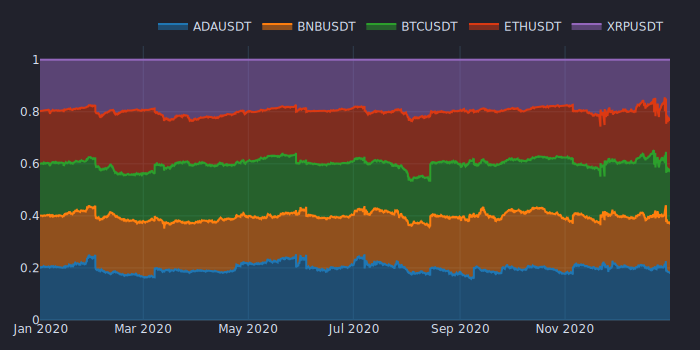

In [89]:
def simulate_threshold_rebalancing(threshold, allocate_func_nb, *args, **kwargs):
    return vbt.Portfolio.from_order_func(
        data.get("Close"),
        order_func_nb, 
        vbt.Rep('price'),  # (1)!
        vbt.Rep('fees'),
        open=data.get("Open"),  # (2)!
        pre_group_func_nb=pre_group_func_nb, 
        pre_group_args=(),
        pre_segment_func_nb=pre_segment_func_nb, 
        pre_segment_args=(
            0,  # (3)!
            vbt.Rep("threshold"),  # (4)!
            allocate_func_nb,
            *args
        ),
        broadcast_named_args=dict(
            price=data.get("Close"),
            fees=0.005,
            threshold=threshold
        ),
        cash_sharing=True,
        group_by=vbt.ExceptLevel("symbol"),  # (5)!
        freq='1h', 
        **kwargs
    )

pf = simulate_threshold_rebalancing(0.05, uniform_allocate_func_nb)
sim_alloc = pf.get_asset_value(group_by=False).vbt / pf.value
sim_alloc.vbt.plot(
   trace_kwargs=dict(stackgroup="one"),
   use_gl=False
).show_svg()

In [90]:
pf = simulate_threshold_rebalancing(
    pd.Index(np.arange(1, 16) / 100, name="threshold"), 
    uniform_allocate_func_nb
)

pf.sharpe_ratio

threshold
0.01    1.939476
0.02    1.964376
0.03    1.985139
0.04    1.984409
0.05    1.993303
0.06    2.019515
0.07    1.983011
0.08    2.047519
0.09    2.087105
0.10    1.939005
0.11    1.962413
0.12    1.978247
0.13    1.963005
0.14    1.969650
0.15    1.983107
Name: sharpe_ratio, dtype: float64

### Post-analysis

In [91]:
@njit
def track_uniform_allocate_func_nb(c, group_memory, index_points, alloc_counter):
    for group_col in range(c.group_len):
        group_memory.target_alloc[group_col] = 1 / c.group_len
    index_points[alloc_counter[0]] = c.i
    alloc_counter[0] += 1

index_points = np.empty(data.wrapper.shape[0], dtype=np.int_)  # (1)!
alloc_counter = np.full(1, 0)  # (2)!
pf = simulate_threshold_rebalancing(
    0.05,
    track_uniform_allocate_func_nb, 
    index_points, 
    alloc_counter
)
index_points = index_points[:alloc_counter[0]]  # (3)!

data.wrapper.index[index_points]

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-02-02 04:00:00+00:00',
               '2020-03-07 15:00:00+00:00', '2020-05-28 18:00:00+00:00',
               '2020-06-03 16:00:00+00:00', '2020-07-07 13:00:00+00:00',
               '2020-08-14 17:00:00+00:00', '2020-09-09 01:00:00+00:00',
               '2020-11-05 13:00:00+00:00', '2020-11-21 14:00:00+00:00',
               '2020-11-24 00:00:00+00:00', '2020-12-22 17:00:00+00:00',
               '2020-12-23 11:00:00+00:00', '2020-12-28 23:00:00+00:00',
               '2020-12-29 16:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [93]:
from vectorbtpro.portfolio.enums import alloc_point_dt

@njit
def random_allocate_func_nb(
    c, 
    group_memory, 
    alloc_points, 
    allocations, 
    alloc_counter
):
    weights = np.random.uniform(0, 1, c.group_len)
    group_memory.target_alloc[:] = weights / weights.sum()
    
    group_count = alloc_counter[c.group]
    count = alloc_counter.sum()
    alloc_points["id"][count] = group_count
    alloc_points["col"][count] = c.group
    alloc_points["alloc_idx"][count] = c.i
    allocations[count] = group_memory.target_alloc
    alloc_counter[c.group] += 1

thresholds = pd.Index(np.arange(1, 16) / 100, name="threshold")
max_entries = data.wrapper.shape[0] * len(thresholds)
alloc_points = np.empty(max_entries, dtype=alloc_point_dt)
allocations = np.empty((max_entries, len(data.symbols)), dtype=np.float_)
alloc_counter = np.full(len(thresholds), 0)

pf = simulate_threshold_rebalancing(
    thresholds,
    random_allocate_func_nb, 
    alloc_points, 
    allocations,
    alloc_counter,
    seed=42
)
alloc_points = alloc_points[:alloc_counter.sum()]
allocations = allocations[:alloc_counter.sum()]

In [95]:
from vectorbtpro.portfolio.enums import alloc_point_dt

@njit
def random_allocate_func_nb(c, group_memory):
    weights = np.random.uniform(0, 1, c.group_len)
    group_memory.target_alloc[:] = weights / weights.sum()
    
    group_count = c.in_outputs.alloc_counter[c.group]
    count = c.in_outputs.alloc_counter.sum()
    c.in_outputs.alloc_points["id"][count] = group_count
    c.in_outputs.alloc_points["col"][count] = c.group
    c.in_outputs.alloc_points["alloc_idx"][count] = c.i
    c.in_outputs.allocations[count] = group_memory.target_alloc
    c.in_outputs.alloc_counter[c.group] += 1

alloc_points = vbt.RepEval("""
    max_entries = target_shape[0] * len(group_lens)
    np.empty(max_entries, dtype=alloc_point_dt)
""", context=dict(alloc_point_dt=alloc_point_dt))
allocations = vbt.RepEval("""
    max_entries = target_shape[0] * len(group_lens)
    np.empty((max_entries, n_cols), dtype=np.float_)
""", context=dict(n_cols=len(data.symbols)))
alloc_counter = vbt.RepEval("np.full(len(group_lens), 0)")

InOutputs = namedtuple("InOutputs", [
    "alloc_points",
    "allocations",
    "alloc_counter"
])
in_outputs = InOutputs(
    alloc_points=alloc_points, 
    allocations=allocations,
    alloc_counter=alloc_counter,
)

pf = simulate_threshold_rebalancing(
    pd.Index(np.arange(1, 16) / 100, name="threshold"),
    random_allocate_func_nb, 
    in_outputs=in_outputs,
    seed=42
)
alloc_points = pf.in_outputs.alloc_points[:pf.in_outputs.alloc_counter.sum()]
allocations = pf.in_outputs.allocations[:pf.in_outputs.alloc_counter.sum()]

In [96]:
pf_opt = vbt.PortfolioOptimizer(
    wrapper=pf.wrapper,
    alloc_records=vbt.AllocPoints(
        pf.wrapper.resolve(), 
        alloc_points
    ),
    allocations=allocations
)

In [97]:
print(pf_opt[0.1].allocations.describe())

symbol   ADAUSDT   BNBUSDT   BTCUSDT   ETHUSDT   XRPUSDT
count   6.000000  6.000000  6.000000  6.000000  6.000000
mean    0.159883  0.149608  0.156493  0.292615  0.241400
std     0.092490  0.079783  0.043584  0.098891  0.083152
min     0.076678  0.056292  0.094375  0.200873  0.098709
25%     0.091023  0.082134  0.149385  0.220957  0.223424
50%     0.123982  0.157974  0.153985  0.252078  0.243109
75%     0.230589  0.204527  0.156810  0.375171  0.293097
max     0.288493  0.248507  0.231013  0.423879  0.336853


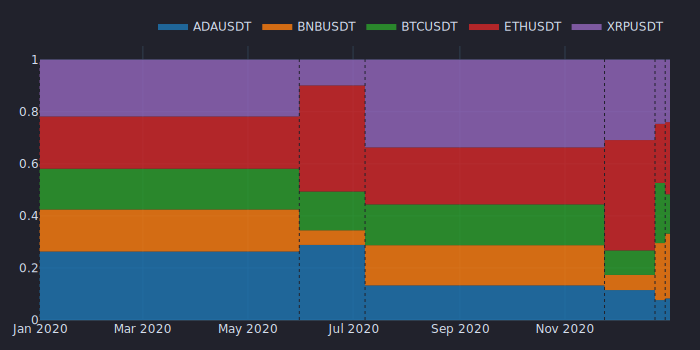

In [98]:
pf_opt.plot(column=0.1).show_svg()

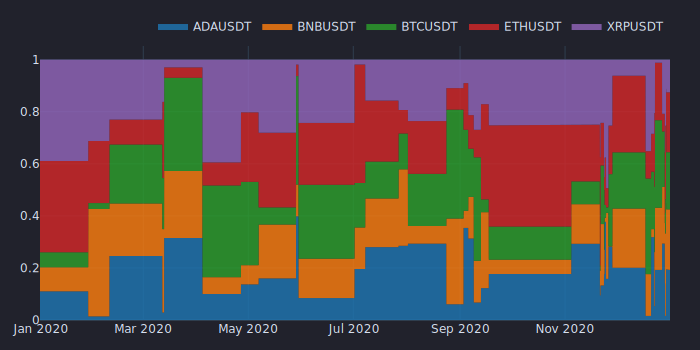

In [99]:
pf_opt.plot(column=0.03).show_svg()

/Users/olegpolakow/Documents/GitHub/vectorbt.pro/vectorbtpro/portfolio/base.py:2550: UserWarning:

Cannot figure out how to index object 'None'



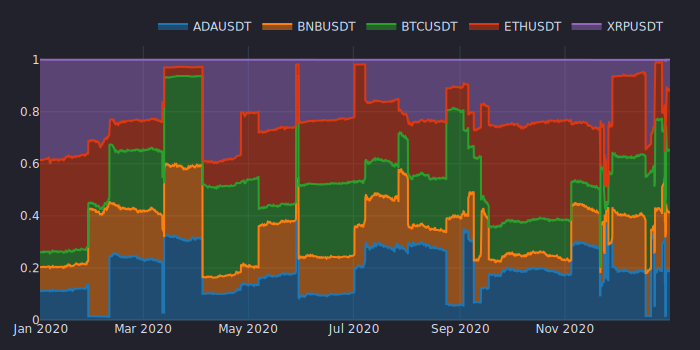

In [100]:
sim_alloc = pf[0.03].get_asset_value(group_by=False).vbt / pf[0.03].value
sim_alloc.columns = data.symbols
sim_alloc.vbt.plot(
   trace_kwargs=dict(stackgroup="one"),
   use_gl=False
).show_svg()

In [101]:
pf.sharpe_ratio

threshold
0.01    1.098589
0.02    1.707435
0.03    1.774934
0.04    2.077395
0.05    2.082810
0.06    1.964397
0.07    2.106276
0.08    2.121431
0.09    1.838085
0.10    2.072324
0.11    2.228911
0.12    1.766233
0.13    1.859528
0.14    2.209064
0.15    2.124389
Name: sharpe_ratio, dtype: float64

In [102]:
pf_new = vbt.Portfolio.from_optimizer(
    pf_opt, 
    data.get("Close"), 
    val_price=data.get("Open"), 
    freq="1h", 
    fees=0.005
)

pf_new.sharpe_ratio

threshold
0.01    1.098589
0.02    1.707435
0.03    1.774934
0.04    2.077395
0.05    2.082810
0.06    1.964397
0.07    2.106276
0.08    2.121431
0.09    1.838085
0.10    2.072324
0.11    2.228911
0.12    1.766233
0.13    1.859528
0.14    2.209064
0.15    2.124389
Name: sharpe_ratio, dtype: float64

### Bonus 1: Own optimizer

In [103]:
from vectorbtpro.portfolio.enums import (
    ExecState, 
    PriceArea, 
    order_dt
)
from vectorbtpro.base.indexing import flex_select_auto_nb
from vectorbtpro.generic import nb as generic_nb

@njit(nogil=True)
def optimize_portfolio_nb(
    close, 
    val_price,
    index_ranges,
    optimize_func_nb,
    optimize_args=(),
    price=np.asarray(np.inf),
    fees=np.asarray(0.),
    init_cash=100.,
    group=0
):
    order_records = np.empty(close.shape, dtype=order_dt)
    order_counts = np.full(close.shape[1], 0, dtype=np.int_)
    
    order_value = np.empty(close.shape[1], dtype=np.float_)
    call_seq = np.empty(close.shape[1], dtype=np.int_)
    
    last_position = np.full(close.shape[1], 0.0, dtype=np.float_)
    last_debt = np.full(close.shape[1], 0.0, dtype=np.float_)
    cash_now = float(init_cash)
    free_cash_now = float(init_cash)
    value_now = float(init_cash)

    for k in range(len(index_ranges)):
        i = index_ranges[k][1]
        size = optimize_func_nb(
            index_ranges[k][0], 
            index_ranges[k][1], 
            *optimize_args
        )
        
        value_now = cash_now
        for col in range(close.shape[1]):
            val_price_now = flex_select_auto_nb(val_price, i, col, True)
            value_now += last_position[col] * val_price_now
        
        for col in range(close.shape[1]):
            call_seq[col] = col
            val_price_now = flex_select_auto_nb(val_price, i, col, True)
            order_value[col] = pf_nb.approx_order_value_nb(
                size[col],
                SizeType.TargetPercent,
                Direction.Both,
                cash_now,
                last_position[col],
                free_cash_now,
                val_price_now,
                value_now,
            )

        pf_nb.insert_argsort_nb(order_value, call_seq)

        for c in range(close.shape[1]):
            col = call_seq[c]
            
            order = pf_nb.order_nb(
                size=size[col],
                price=flex_select_auto_nb(price, i, col, True),
                size_type=SizeType.TargetPercent,
                direction=Direction.Both,
                fees=flex_select_auto_nb(fees, i, col, True),
            )
            price_area = PriceArea(
                open=np.nan,
                high=np.nan,
                low=np.nan,
                close=flex_select_auto_nb(close, i, col, True),
            )
            val_price_now = flex_select_auto_nb(val_price, i, col, True)
            exec_state = ExecState(
                cash=cash_now,
                position=last_position[col],
                debt=last_debt[col],
                free_cash=free_cash_now,
                val_price=val_price_now,
                value=value_now,
            )
            new_exec_state, order_result = pf_nb.process_order_nb(
                group=group,
                col=col,
                i=i,
                exec_state=exec_state,
                order=order,
                price_area=price_area,
                order_records=order_records,
                order_counts=order_counts
            )

            cash_now = new_exec_state.cash
            free_cash_now = new_exec_state.free_cash
            value_now = new_exec_state.value
            last_position[col] = new_exec_state.position
            last_debt[col] = new_exec_state.debt

    return generic_nb.repartition_nb(order_records, order_counts)

In [104]:
@njit(nogil=True)
def sharpe_optimize_func_nb(
    start_idx, 
    end_idx, 
    close, 
    num_tests, 
    ann_factor
):
    close_period = close[start_idx:end_idx]
    returns = (close_period[1:] - close_period[:-1]) / close_period[:-1]
    mean = generic_nb.nanmean_nb(returns)
    cov = np.cov(returns, rowvar=False)
    best_sharpe_ratio = -np.inf
    weights = np.full(close.shape[1], np.nan, dtype=np.float_)
    
    for i in range(num_tests):
        w = np.random.random_sample(close.shape[1])
        w = w / np.sum(w)
        p_return = np.sum(mean * w) * ann_factor
        p_std = np.sqrt(np.dot(w.T, np.dot(cov, w))) * np.sqrt(ann_factor)
        sharpe_ratio = p_return / p_std
        if sharpe_ratio > best_sharpe_ratio:
            best_sharpe_ratio = sharpe_ratio
            weights = w
            
    return weights

In [105]:
index_ranges = data.wrapper.get_index_ranges(every="W")
ann_factor = pd.Timedelta("365d") / pd.Timedelta("1h")
init_cash = 100
num_tests = 30
fees = np.asarray(0.005)

order_records = optimize_portfolio_nb(
    data.get("Close").values,
    data.get("Open").values,
    index_ranges,
    sharpe_optimize_func_nb,
    optimize_args=(data.get("Close").values, num_tests, ann_factor),
    fees=fees,
    init_cash=init_cash
)

In [106]:
pf = vbt.Portfolio(
    wrapper=symbol_wrapper.regroup(True), 
    close=data.get("Close"), 
    order_records=order_records, 
    log_records=np.array([]), 
    cash_sharing=True, 
    init_cash=init_cash
)

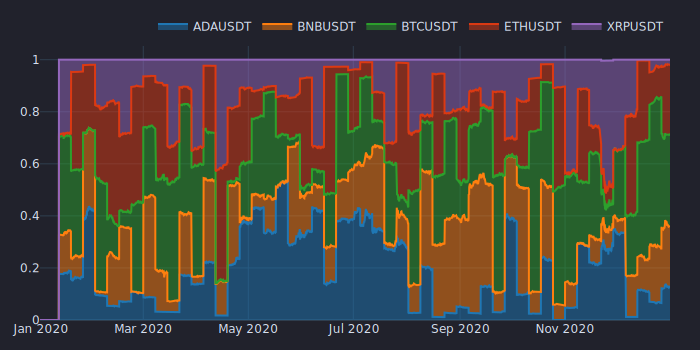

In [107]:
sim_alloc = pf.get_asset_value(group_by=False).vbt / pf.value
sim_alloc.vbt.plot(
   trace_kwargs=dict(stackgroup="one"),
   use_gl=False
).show_svg()

In [108]:
test_index_ranges = pd.Index(["D", "W", "MS"], name="every")  # (1)!
test_num_tests = pd.Index([30, 50, 100], name="num_tests")
test_fees = pd.Index([0.0, 0.005, 0.01], name="fees")

index_ranges_cache = {}  # (2)!
for every in test_index_ranges:
    index_ranges_cache[every] = symbol_wrapper.get_index_ranges(every=every)

param_index = vbt.combine_indexes((  # (3)!
    test_index_ranges, 
    test_num_tests,
    test_fees
))

kwargs = dict(  # (4)!
    close=data.get("Close").values,
    val_price=data.get("Open").values,
    optimize_func_nb=sharpe_optimize_func_nb,
    init_cash=init_cash
)
funcs_args = []
for i in range(len(param_index)):  # (5)!
    funcs_args.append((
        optimize_portfolio_nb,
        (),
        {
            **kwargs,
            "index_ranges": index_ranges_cache[param_index[i][0]],
            "optimize_args": (
                kwargs["close"],
                param_index[i][1],
                ann_factor
            ),
            "fees": np.asarray(param_index[i][2]),
            "group": i
        }
    ))
order_records_list = vbt.execute(  # (6)!
    funcs_args, 
    chunk_len=4, 
    engine="dask"
)

  0%|          | 0/7 [00:00<?, ?it/s]

In [109]:
sharpe_ratios = pd.Series(index=param_index, dtype=np.float_)
for i, order_records in enumerate(order_records_list):
    pf = vbt.Portfolio(
        wrapper=symbol_wrapper.regroup(True), 
        close=data.get("Close"), 
        order_records=order_records, 
        log_records=np.array([]), 
        cash_sharing=True, 
        init_cash=init_cash
    )
    sharpe_ratios[i] = pf.sharpe_ratio

sharpe_ratios

every  num_tests  fees 
D      30         0.000    2.165566
                  0.005    0.371933
                  0.010   -1.323264
       50         0.000    2.218380
                  0.005    0.144810
                  0.010   -1.466483
       100        0.000    2.139512
                  0.005    0.127646
                  0.010   -1.673416
W      30         0.000    2.363593
                  0.005    2.369056
                  0.010    1.957732
       50         0.000    2.510967
                  0.005    2.259865
                  0.010    2.050447
       100        0.000    2.584706
                  0.005    2.177242
                  0.010    2.034760
MS     30         0.000    1.702061
                  0.005    1.758899
                  0.010    1.838317
       50         0.000    1.510154
                  0.005    1.649829
                  0.010    1.587688
       100        0.000    1.973116
                  0.005    1.735977
                  0.010    1.568054
dtyp

### Bonus 2: Hyperopt

In [110]:
def objective(kwargs):
    close_values = data.get("Close").values
    open_values = data.get("Open").values
    index_ranges = symbol_wrapper.get_index_ranges(every=kwargs["every"])
    order_records = optimize_portfolio_nb(
        close_values,
        open_values,
        index_ranges,
        sharpe_optimize_func_nb,
        optimize_args=(close_values, kwargs["num_tests"], ann_factor),
        fees=np.asarray(kwargs["fees"]),
        init_cash=init_cash
    )
    pf = vbt.Portfolio(
        wrapper=symbol_wrapper.regroup(True), 
        close=data.get("Close"), 
        order_records=order_records, 
        log_records=np.array([]), 
        cash_sharing=True, 
        init_cash=init_cash
    )
    return -pf.sharpe_ratio  # (1)!

In [111]:
from hyperopt import fmin, tpe, hp

space = {
    "every": hp.choice("every", ["%dD" % n for n in range(1, 100)]),
    "num_tests": hp.quniform("num_tests", 5, 100, 1),
    "fees": hp.uniform('fees', 0, 0.05)
}

best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=30
)
best

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 11.01trial/s, best loss: -2.762033828927463]


{'every': 71, 'fees': 0.006928274501339069, 'num_tests': 99.0}